### Attempt #3 for Data Question 1 after completing 25 chapters of Python in Data Camp

>import packages

In [12]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

> using **%matplotlib inline** allows you to see plots within the notebook

In [13]:
%matplotlib inline

> reading datasets into the notebook as data frames (df) as **pop_df** and **mig_df** 

> *imported data with new column names. errors in the data required ignoring the fourth column (useless footnote data) by using only the first 3.* **This was reversed** because of later instructions (7-9). To reinsert this, use: 
* usecols=[0,1,2], **(for pop_df)**
* usecols=[0,1,2], names=['Country','Year','Net_Migration'] **(for mig_df)**

> skipped footer, last 191 lines, because of data within fields having commas, skewing columns in a comma delimited file

In [14]:
pop_df = pd.read_csv('UN_Percent_using_internet.csv', header=0, skipfooter=191, error_bad_lines=False, engine='python')
mig_df = pd.read_csv('UN_Net_Migration.csv', header=0, error_bad_lines=False, engine='python')

Skipping line 4675: ',' expected after '"'. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


### Identifying column data types and printing the first 6 rows of each dataframe.

In [15]:
pop_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [16]:
pop_df.head(n=6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


In [17]:
mig_df.dtypes

Country or Area     object
Year                 int64
Value                int64
Value Footnotes    float64
dtype: object

In [18]:
mig_df.head(n=6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2012,473007,NaN
1,Afghanistan,2007,-677497,NaN
2,Afghanistan,2002,804120,NaN
3,Afghanistan,1997,-379474,NaN
4,Afghanistan,1992,2227474,NaN
5,Afghanistan,1987,-1484185,NaN


### Dropping footnotes data from column 4.
> axis=1 instructs to drop column, axis=0 instructs row

In [19]:
mig_df = mig_df.drop('Value Footnotes', axis=1)

In [20]:
pop_df = pop_df.drop('Value Footnotes', axis=1)

### Renaming columns

In [21]:
pop_df.columns = ['Country','Year','Internet_Users_Pct']

In [22]:
mig_df.columns = ['Country','Year','Net_Migration']

### Confirming changes

In [23]:
pop_df.head(n=5)

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [24]:
mig_df.head(n=5)

,Country,Year,Net_Migration
0,Afghanistan,2012,473007
1,Afghanistan,2007,-677497
2,Afghanistan,2002,804120
3,Afghanistan,1997,-379474
4,Afghanistan,1992,2227474


### 10. Merging 2 dataframes into 1
> pop_df + mig_df = df_merge

In [25]:
df_merge = pd.merge(left=pop_df, right=mig_df, on=['Country','Year'])

### Look at first 5 lines

In [26]:
df_merge.head(n=5)

,Country,Year,Internet_Users_Pct,Net_Migration
0,Afghanistan,2012,5.454545,473007
1,Afghanistan,2007,1.900000,-677497
2,Afghanistan,2002,0.004561,804120
3,Albania,2012,54.655959,-91750
4,Albania,2007,15.036115,-252926


### Look at last 5 lines

In [27]:
df_merge.tail(n=5)

,Country,Year,Internet_Users_Pct,Net_Migration
708,Zambia,2007,4.870000,-124044
709,Zambia,2002,0.477751,-93014
710,Zambia,1997,0.009330,79445
711,Zimbabwe,2012,17.090000,-219922
712,Zimbabwe,2007,10.850000,-307650


### Creating a list of years 2002, 2007, 2012 and then each in a separate data frame

In [28]:
subset_3yrs = ['2002','2007','2012']

### Creating Data Frame for 2002, 2007, 2012 data. Initially thought the instructions were to subset a list, but Q.26 suggests having it in a DataFrame. 

In [72]:
yr3_df = df_merge.loc[df_merge['Year'].isin([2002,2007,2012])]
print(yr3_df.head())

       Country  Year  Internet_Users_Pct  Net_Migration
0  Afghanistan  2012            5.454545         473007
1  Afghanistan  2007            1.900000        -677497
2  Afghanistan  2002            0.004561         804120
3      Albania  2012           54.655959         -91750
4      Albania  2007           15.036115        -252926


In [29]:
df_2002 = df_merge.loc[df_merge['Year']==2002]
df_2002.head(n=5)

,Country,Year,Internet_Users_Pct,Net_Migration
2,Afghanistan,2002,0.004561,804120
5,Albania,2002,0.390081,-175406
9,Algeria,2002,1.591641,-205228
13,Angola,2002,0.270377,172594
17,Antigua and Barbuda,2002,12.500000,-282


In [30]:
df_2007 = df_merge.loc[df_merge['Year']==2007]
df_2007.head(n=5)

,Country,Year,Internet_Users_Pct,Net_Migration
1,Afghanistan,2007,1.900000,-677497
4,Albania,2007,15.036115,-252926
8,Algeria,2007,9.451191,-357340
12,Angola,2007,3.200000,85286
16,Antigua and Barbuda,2007,34.000000,-92


In [31]:
df_2012 = df_merge.loc[df_merge['Year']==2012]
df_2012.head(n=5)

,Country,Year,Internet_Users_Pct,Net_Migration
0,Afghanistan,2012,5.454545,473007
3,Albania,2012,54.655959,-91750
7,Algeria,2012,15.228027,-143268
11,Angola,2012,16.937210,102322
15,Antigua and Barbuda,2012,58.000000,-56


### Question 15:
> Which country had the highest percent of internet users in 2012?

> **Iceland** had the highest percent of internet users in 2012 with **96.2098%**

*see below*

In [32]:
df_2012.loc[df_2012['Internet_Users_Pct']==[df_2012['Internet_Users_Pct'].max()]]

,Country,Year,Internet_Users_Pct,Net_Migration
294,Iceland,2012,96.2098,-378


### Question 16:
> Which country had the lowest percent of internet users in 2012?

> **Eritrea** had the lowest percent of internet users in 2012 with **0.8%

*see below*

In [33]:
df_2012.loc[df_2012['Internet_Users_Pct']==[df_2012['Internet_Users_Pct'].min()]]

,Country,Year,Internet_Users_Pct,Net_Migration
202,Eritrea,2012,0.8,-160001


### Question 17:
> Which countries had the lowest percent of internet users in 2002 and 2007?
>>Timor-Leste had 0.0% of internet users in **2002**.

>>Timor-Leste had 0.140959% of internet users in **2007**.

> Which countries had the highest percent of internet users in 2002 and 2007?
>>Iceland had **79.12%** of internet users in **2002**.

>>Iceland had **90.6%** of internet users in **2007**.

*see below*

In [34]:
df_2002.loc[df_2002['Internet_Users_Pct']==[df_2002['Internet_Users_Pct'].max()]]

,Country,Year,Internet_Users_Pct,Net_Migration
296,Iceland,2002,79.12,3894


In [35]:
df_2002.loc[df_2002['Internet_Users_Pct']==[df_2002['Internet_Users_Pct'].min()]]

,Country,Year,Internet_Users_Pct,Net_Migration
641,Timor-Leste,2002,0.0,12


In [36]:
df_2007.loc[df_2007['Internet_Users_Pct']==[df_2007['Internet_Users_Pct'].max()]]

,Country,Year,Internet_Users_Pct,Net_Migration
295,Iceland,2007,90.6,8041


In [37]:
df_2007.loc[df_2007['Internet_Users_Pct']==[df_2007['Internet_Users_Pct'].min()]]

,Country,Year,Internet_Users_Pct,Net_Migration
640,Timor-Leste,2007,0.140959,-104946


### Question 19:
> Which country had the highest net migration in 2012? What was the net migration?
>> The **United States** had the highest net migration in 2012 with **5,007,887**.

*see below*

In [38]:
df_2012.loc[df_2012['Net_Migration']==[df_2012['Net_Migration'].max()]]

,Country,Year,Internet_Users_Pct,Net_Migration
686,United States,2012,79.3,5007887


### Question 20:
> Which country had the lowest net migration in 2012? What was the net migration?
>> **India** had the lowest net migration in 2012 with **-2,598,218**.

*see below*

In [39]:
df_2012.loc[df_2012['Net_Migration']==[df_2012['Net_Migration'].min()]]

,Country,Year,Internet_Users_Pct,Net_Migration
299,India,2012,12.580061,-2598218


### 2002 Net Migration vs. Percentage of Internet Users
#### setting consistent scale among all plots for ease of comparison

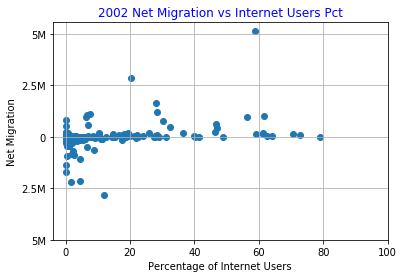

In [64]:
plt.scatter(df_2002.Internet_Users_Pct,df_2002.Net_Migration)
plt.title('2002 Net Migration vs Internet Users Pct', color='blue')
plt.ylabel('Net Migration')
plt.xlabel('Percentage of Internet Users')
plt.yticks([-5000000,-2500000,0,2500000,5000000],['5M','2.5M','0','2.5M','5M'])
plt.xticks([0,20,40,60,80,100])
plt.grid()
plt.show()


### 2007 Net Migration vs. Percentage of Internet Users

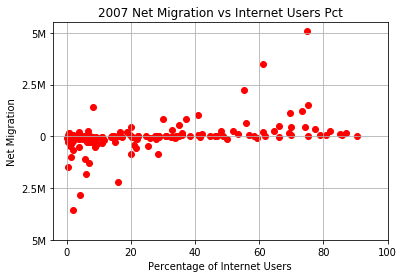

In [65]:
plt.scatter(df_2007.Internet_Users_Pct,df_2007.Net_Migration, color = 'red')
plt.title('2007 Net Migration vs Internet Users Pct')
plt.ylabel('Net Migration')
plt.xlabel('Percentage of Internet Users')
plt.yticks([-5000000,-2500000,0,2500000,5000000],['5M','2.5M','0','2.5M','5M'])
plt.xticks([0,20,40,60,80,100])
plt.grid()
plt.show()

### 2012 Net Migration vs. Percentage of Internet Users

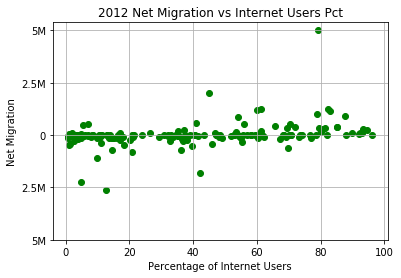

In [66]:
plt.scatter(df_2012.Internet_Users_Pct,df_2012.Net_Migration, color = 'green')
plt.title('2012 Net Migration vs Internet Users Pct')
plt.ylabel('Net Migration')
plt.xlabel('Percentage of Internet Users')
plt.yticks([-5000000,-2500000,0,2500000,5000000],['5M','2.5M','0','2.5M','5M'])
plt.xticks([0,20,40,60,80,100])
plt.grid()
plt.show()

### Year over Year Net Migration vs. Internet Users Pct
*not assigned, added for fun*

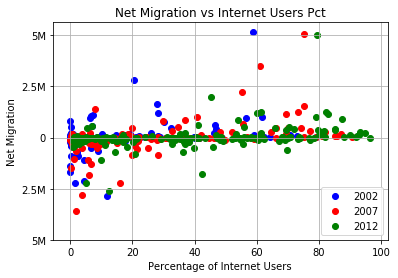

In [67]:
plt.scatter(df_2002.Internet_Users_Pct,df_2002.Net_Migration, color = 'blue')
plt.scatter(df_2007.Internet_Users_Pct,df_2007.Net_Migration, color = 'red')
plt.scatter(df_2012.Internet_Users_Pct,df_2012.Net_Migration, color = 'green')
plt.title('Net Migration vs Internet Users Pct')
plt.ylabel('Net Migration')
plt.xlabel('Percentage of Internet Users')
plt.yticks([-5000000,-2500000,0,2500000,5000000],['5M','2.5M','0','2.5M','5M'])
plt.xticks([0,20,40,60,80,100])
plt.grid()
plt.legend(('2002','2007','2012'),loc='lower right')
plt.show()

### Question 22.
> Are there differences across years? 
>> Yes, there are differences across years. There is a large shift in Percentage of Internet Users from 2002 to 2007 to 2012. The net migration has also shifted closer to zero with fewer outliers. 

>What do the plots tell you about any relationship between these two variables? 
>>Countries with higher internet users pct have a positive net migration, while countries with netgative net migration have a very low percentage of internet users.

### Question 23.
> Look at the distribution of Net Migration values for 2012. Is it unimodal? 
>> No, it is not unimodal. There are multiple peaks and valleys.

### Question 24: 
> Look at the distribution of Internet Use for 2012. Is it unimodal?
>> No, I would consider this to be bimodal, as the outlier with 5M net migration causes a second peak.

### Question 25.
> What are the top 5 countries in terms of internet use in 2012?
>> Iceland, Norway, Sweden, Netherlands, and Denmark are the top 5 countries for Internet Users Pct in 2012.

In [44]:
df_2012.sort_values('Internet_Users_Pct', ascending=False).head(n=5)

,Country,Year,Internet_Users_Pct,Net_Migration
294,Iceland,2012,96.209800,-378
479,Norway,2012,94.649978,235665
614,Sweden,2012,93.179988,272626
453,Netherlands,2012,92.859992,110006
180,Denmark,2012,92.260012,96839


### Question 26.
> Create a new data frame called top_5_internet from the combined data frame that has all three years for these 5 countries. You should have 15 rows. 
>> * Created a list of the Top Countries with 2012 Internet Users
* Created a new Data Frame from the yr3_df (Data Frame for 2002, 2007, 2012 data) using the Country List as the criteria.

In [83]:
country_list = np.array(df_2012.sort_values('Internet_Users_Pct', ascending=False).head(n=5))

top_5_internet = yr3_df.loc[yr3_df['Country'].isin(country_list[:,0])]
print(top_5_internet)


         Country  Year  Internet_Users_Pct  Net_Migration
180      Denmark  2012           92.260012          96839
181      Denmark  2007           85.030000          87989
182      Denmark  2002           64.250000          46306
294      Iceland  2012           96.209800           -378
295      Iceland  2007           90.600000           8041
296      Iceland  2002           79.120000           3894
453  Netherlands  2012           92.859992         110006
454  Netherlands  2007           85.820000          55674
455  Netherlands  2002           61.290000         144620
479       Norway  2012           94.649978         235665
480       Norway  2007           86.930000         174001
481       Norway  2002           72.840000          67400
614       Sweden  2012           93.179988         272626
615       Sweden  2007           82.010000         262453
616       Sweden  2002           70.570000         141723


### Playing with FactorPlot in Seaborn

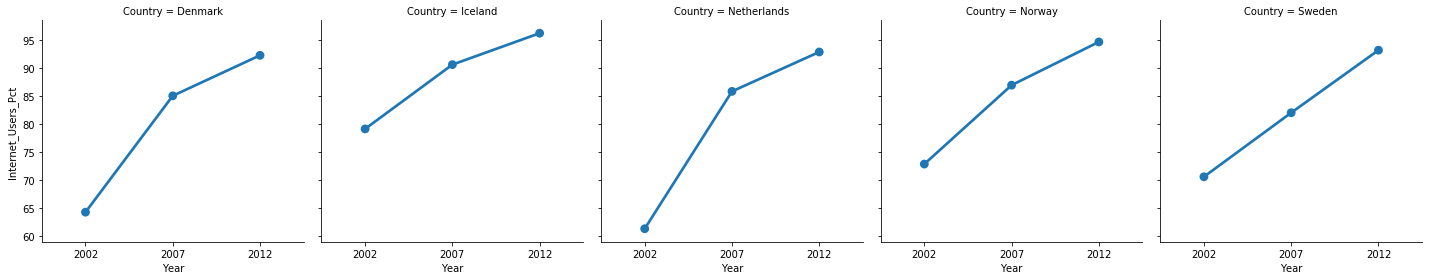

In [86]:
import seaborn as sns
sns.factorplot(data=top_5_internet,x="Year",y="Internet_Users_Pct", col="Country")

### Question. 27
> Creating a seaborn FacetGrid to show internet usage trends for the above 5 countries.

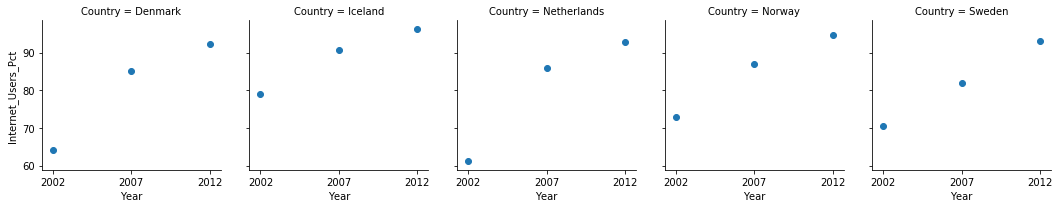

In [92]:
plot = sns.FacetGrid(top_5_internet, col="Country")
plot.map(plt.scatter,"Year","Internet_Users_Pct")
plt.xticks([2002,2007,2012])
plt.show()

### Question. 28 
>Rinse, Repeat. 5 countries with lowest 2012 internet usage.

          Country  Year  Internet_Users_Pct  Net_Migration
108       Burundi  2012            1.220000          40000
109       Burundi  2007            0.700000         163733
110       Burundi  2002            0.118228         112532
202       Eritrea  2012            0.800000        -160001
203       Eritrea  2007            0.410000        -160001
204       Eritrea  2002            0.227090         110001
441       Myanmar  2012            1.069100        -474278
442       Myanmar  2007            0.217128       -1466799
443       Myanmar  2002            0.000426       -1372688
559  Sierra Leone  2012            1.300000         -21000
560  Sierra Leone  2007            0.239835          60000
561  Sierra Leone  2002            0.176199         500000
639   Timor-Leste  2012            0.914700         -50004
640   Timor-Leste  2007            0.140959        -104946
641   Timor-Leste  2002            0.000000             12


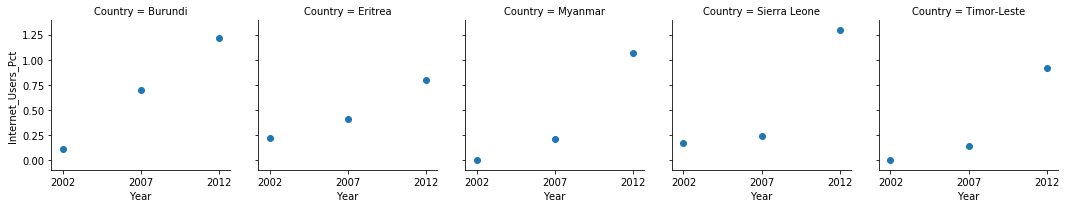

In [93]:
country_list_low = np.array(df_2012.sort_values('Internet_Users_Pct', ascending=True).head(n=5))

bottom_5_internet = yr3_df.loc[yr3_df['Country'].isin(country_list_low[:,0])]
print(bottom_5_internet)
plot = sns.FacetGrid(bottom_5_internet, col="Country")
plot.map(plt.scatter,"Year","Internet_Users_Pct")
plt.xticks([2002,2007,2012])
plt.show()

### Question. 29
> 10 year trend for the Top 5 Countries of 2012 in Net Migration

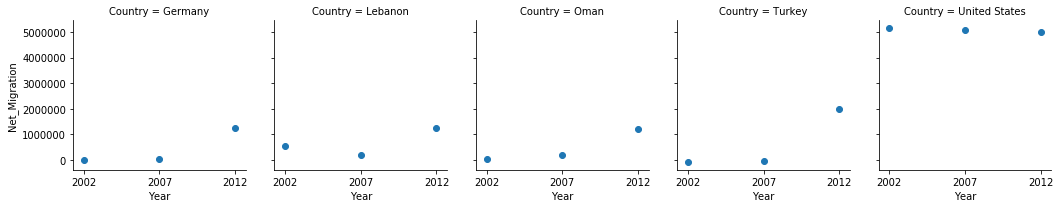

In [101]:
country_list_top_mig = np.array(df_2012.sort_values('Net_Migration', ascending=False).head(n=5))
top_5_mig = yr3_df.loc[yr3_df['Country'].isin(country_list_top_mig[:,0])]
plot = sns.FacetGrid(top_5_mig, col="Country")
plot.map(plt.scatter,"Year","Net_Migration")
plt.xticks([2002,2007,2012])
plt.show()

### Question. 29 *cont.*
> 10 year trend for the Bottom 5 Countries of 2012 in Net Migration

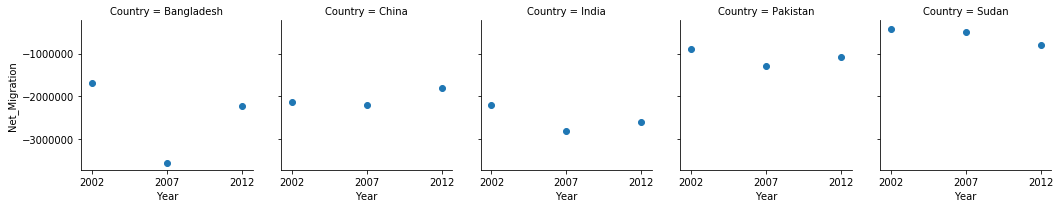

In [102]:
country_list_low_mig = np.array(df_2012.sort_values('Net_Migration', ascending=True).head(n=5))
low_5_mig = yr3_df.loc[yr3_df['Country'].isin(country_list_low_mig[:,0])]
plot = sns.FacetGrid(low_5_mig, col="Country")
plot.map(plt.scatter,"Year","Net_Migration")
plt.xticks([2002,2007,2012])
plt.show()

### Question. 30 
> Is there anything surprising or unusual in any of these plots? 
>> * The top/bottom 5 countries for Internet Usage do not align with the top/bottom 5 countries for net migration, however, the earlier scatter plots do show the outliers of net migration have a direct correlation to the percentage of internet users. Those with extremely high/low net migration had high/low percentage of internet users. A vast majority of countries had net migration close to 0, where those leaving the country were offset by others entering the country. 
* The top 5 countries for net migration saw consistent level in 2002 and 2007, but an increase in 2012. The United States is an outlier with consistent net migration much higher than all other countries. 
* The bottom 5 countries for net migration all saw spikes in migration out of the country, but 10 year trends appear to be constant migration from these countries, given the three points.
